In [1]:
import acquire
import explore
import model

import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

# Big Question: Why are our customers churning?

## Hypotheses:
1. Tenure Cohorts
    - $H_0$: There are no tenure cohort with a higher propensity to churn than others
    - $H_a$: There is a cohort with a higher propensity to churn
2. Features w/ higher churn rate
    - $H_0$: There are no features with a higher churn rate than others
    - $H_a$: There is at least one feature with a higher churn rate
3. Price threshold with higher churn rate
    - $H_0$: There is no price threshold for specific services where the likelihood of churn increases
    - $H_a$: Higher price services are more likeley to churn
4. Month-to-month customers after the 12th month anD 1-year contract customers after the 12th month, are those rates comparable?
    - $H_0$: Month-to-month customers and 1-year contract customers are equally likely to churn after the 12th month
    - $H_a$: Month-to-month customers are more likely to churn after the 12th month than 1-year contract customers

## Acquire and Prep Data
 - See acquire.py and prepare.py for details
 - Produces train, valid & test .csv files

In [2]:
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')
test = pd.read_csv('test.csv')

## Explore Train Data

1. Tenure Cohorts
    - $H_0$: There are no tenure cohort with a higher propensity to churn than others
    - $H_a$: There is a cohort with a higher propensity to churn

2. Features w/ higher churn rate
    - $H_0$: There are no features with a higher churn rate than others
    - $H_a$: There is at least one feature with a higher churn rate

3. Price threshold with higher churn rate
    - $H_0$: There is no price threshold for specific services where the likelihood of churn increases
    - $H_a$: Higher price services are more likeley to churn

4. Month-to-month customers after the 12th month anD 1-year contract customers after the 12th month, are those rates comparable?
    - $H_0$: Month-to-month customers and 1-year contract customers are equally likely to churn after the 12th month
    - $H_a$: Month-to-month customers are more likely to churn after the 12th month than 1-year contract customers

## Create Predictions Using Decision Tree Model

> During the modeling phase, we found that not all the features were as important to the model as others, however, the overall performance of the model was not significantly improved by dropping them. For ease of interpretation ,this model will drop those features.

> Additionally, the model's performance was not significantly enhanced by scaling the features, so this model will be built with the original features.

> Finally, we will us the Decision Tree classifier to model this dataset, because the performance on the validation dataset was similar to the performance of the other models, but the output of the decision tree is more interpretable.

In [3]:
X_train = train[['tenure_years', 'monthly_charges', 'total_charges', 'contract_type_id',
                 'internet_service_type_id', 'internet_services', 'streaming_movies_enc', 'pay_elec_check']]
X_valid = valid[['tenure_years', 'monthly_charges', 'total_charges', 'contract_type_id',
                 'internet_service_type_id', 'internet_services', 'streaming_movies_enc', 'pay_elec_check']]
X_test = test[['tenure_years', 'monthly_charges', 'total_charges', 'contract_type_id',
               'internet_service_type_id', 'internet_services', 'streaming_movies_enc', 'pay_elec_check']]

y_train = train.churn
y_valid = valid.churn
y_test = test.churn

In [4]:
# Make the model
DT_model = model.model_maker(X_train, y_train, 'DT', 143)
DT_preds, DT_probs = model.model_predictor(X_train, DT_model)
DT_conf, DT_report = model.model_evaluator(y_train, DT_preds)
print (DT_report)

              precision    recall  f1-score   support

          No       0.81      0.94      0.87      3320
         Yes       0.70      0.40      0.51      1187

    accuracy                           0.80      4507
   macro avg       0.76      0.67      0.69      4507
weighted avg       0.78      0.80      0.78      4507



In [5]:
# Test the model's performance on the validation set
DTv_preds, DTv_probs = model.model_predictor(X_valid, DT_model)
DTv_conf, DTv_report = model.model_evaluator(y_valid, DTv_preds)
print (DTv_report)

              precision    recall  f1-score   support

          No       0.81      0.95      0.87       837
         Yes       0.72      0.34      0.46       290

    accuracy                           0.80      1127
   macro avg       0.76      0.65      0.67      1127
weighted avg       0.78      0.80      0.77      1127



In [6]:
# Test the model's performance on the test set
DTt_preds, DTt_probs = model.model_predictor(X_test, DT_model)
DTt_conf, DTt_report = model.model_evaluator(y_test, DTt_preds)
print (DTt_report)

              precision    recall  f1-score   support

          No       0.79      0.94      0.86      1017
         Yes       0.69      0.36      0.47       392

    accuracy                           0.78      1409
   macro avg       0.74      0.65      0.67      1409
weighted avg       0.76      0.78      0.75      1409



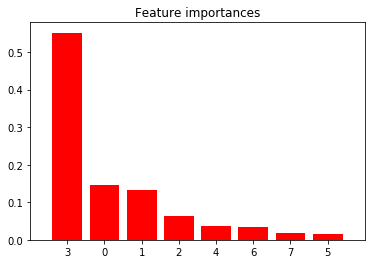

In [7]:
# Feature Importance of the models

importances = DT_model.feature_importances_

indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [8]:
# Drop all features with importance < 0
list(zip(X_train.columns, DT_model.feature_importances_))

[('tenure_years', 0.14725478457789112),
 ('monthly_charges', 0.13259613313929344),
 ('total_charges', 0.06332543152987603),
 ('contract_type_id', 0.5515174708350035),
 ('internet_service_type_id', 0.037640751527220524),
 ('internet_services', 0.015665124447355665),
 ('streaming_movies_enc', 0.032868776120295186),
 ('pay_elec_check', 0.01913152782306461)]

In [9]:
# Confusion Matrices
DT_conf

,loyal predicted,churn predicted
actual,,
loyal,3118,202
churn,714,473


In [10]:
DTv_conf

,loyal predicted,churn predicted
actual,,
loyal,798,39
churn,192,98


In [11]:
DTt_conf

,loyal predicted,churn predicted
actual,,
loyal,955,62
churn,252,140


In [16]:
import graphviz
from graphviz import Graph
from sklearn.tree import export_graphviz

dot_data = export_graphviz(DT_model, out_file=None, filled=True, proportion=True, class_names=['loyal', 'churn'],
                           impurity=False, rotate=True, rounded=True, 
                           feature_names=['tenure_years', 'monthly_charges', 'total_charges', 'contract_type_id',
                 'internet_service_type_id', 'internet_services', 'streaming_movies_enc', 'pay_elec_check']) 
graph = graphviz.Source(dot_data) 

graph.render('telco_decision_tree', view=True)

'telco_decision_tree.pdf'

In [17]:
# Produce a .csv with the customer_id, probability of churn, and the prediction of churn (1=churn, 0=not_churn).

In [18]:
train_probs = pd.DataFrame(DT_probs)
valid_probs = pd.DataFrame(DTv_probs)
test_probs = pd.DataFrame(DTt_probs)

train_preds = pd.DataFrame(DT_preds)
valid_preds = pd.DataFrame(DTv_preds)
test_preds = pd.DataFrame(DTt_preds)

In [19]:
train_probs = train_probs.rename(columns={1: 'probabblah'})
valid_probs = valid_probs.rename(columns={1: 'probabblah'})
test_probs = test_probs.rename(columns={1: 'probabblah'})

train_preds = train_preds.rename(columns={0: 'pred'})
valid_preds = valid_preds.rename(columns={0: 'pred'})
test_preds = test_preds.rename(columns={0: 'pred'})

In [20]:
results_train = pd.DataFrame(train.customer_id)
results_valid = pd.DataFrame(valid.customer_id)
results_test = pd.DataFrame(test.customer_id)

results_train['Probability_churn'] = train_probs['probabblah']
results_train['Prediction'] = train_preds['pred']

results_valid['Probability_churn'] = valid_probs['probabblah']
results_valid['Prediction'] = valid_preds['pred']

results_test['Probability_churn'] = test_probs['probabblah']
results_test['Prediction'] = test_preds['pred']

In [21]:
results = results_train.append(results_valid)
results = results_train.append(results_test)
results

,customer_id,Probability_churn,Prediction
0,5044-LRQAQ,0.500,No
1,2397-BRLOM,0.703,Yes
2,3932-CMDTD,0.164,No
3,4990-ALDGW,0.024,No
4,3422-GALYP,0.703,Yes
...,...,...,...
1404,3229-USWAR,0.164,No
1405,8260-NGFNY,0.593,Yes
1406,5334-JLAXU,0.239,No
1407,2674-MIAHT,0.703,Yes


In [22]:
results.to_csv('results.csv')